<a href="https://www.kaggle.com/code/ouzcanmaden/a-b-testing?scriptVersionId=137272838" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/ab-testing/ab_data.csv
/kaggle/input/ab-test-data/AB_Test_Results.csv


<h1 style="color:#FFFFFF;
           text-align:center;
           display:fill;
           border-radius:7px;
           background-color:#0B3D91;
           font-size:250%;
           font-family:Arial, sans-serif;
           font-weight:bold;
           padding: 15px;
           letter-spacing:0.5px">
    A/B TESTING
</h1>
<div style="text-align:right; 
            margin-top: -20px; 
            font-family: Arial; 
            font-style: italic;">
    by Oguzcan Maden
</div>
<hr style="border: none;
           height: 6px; 
           border-radius:7px;
           background-color: #0B3D91; 
           margin: 20px auto;">
           
  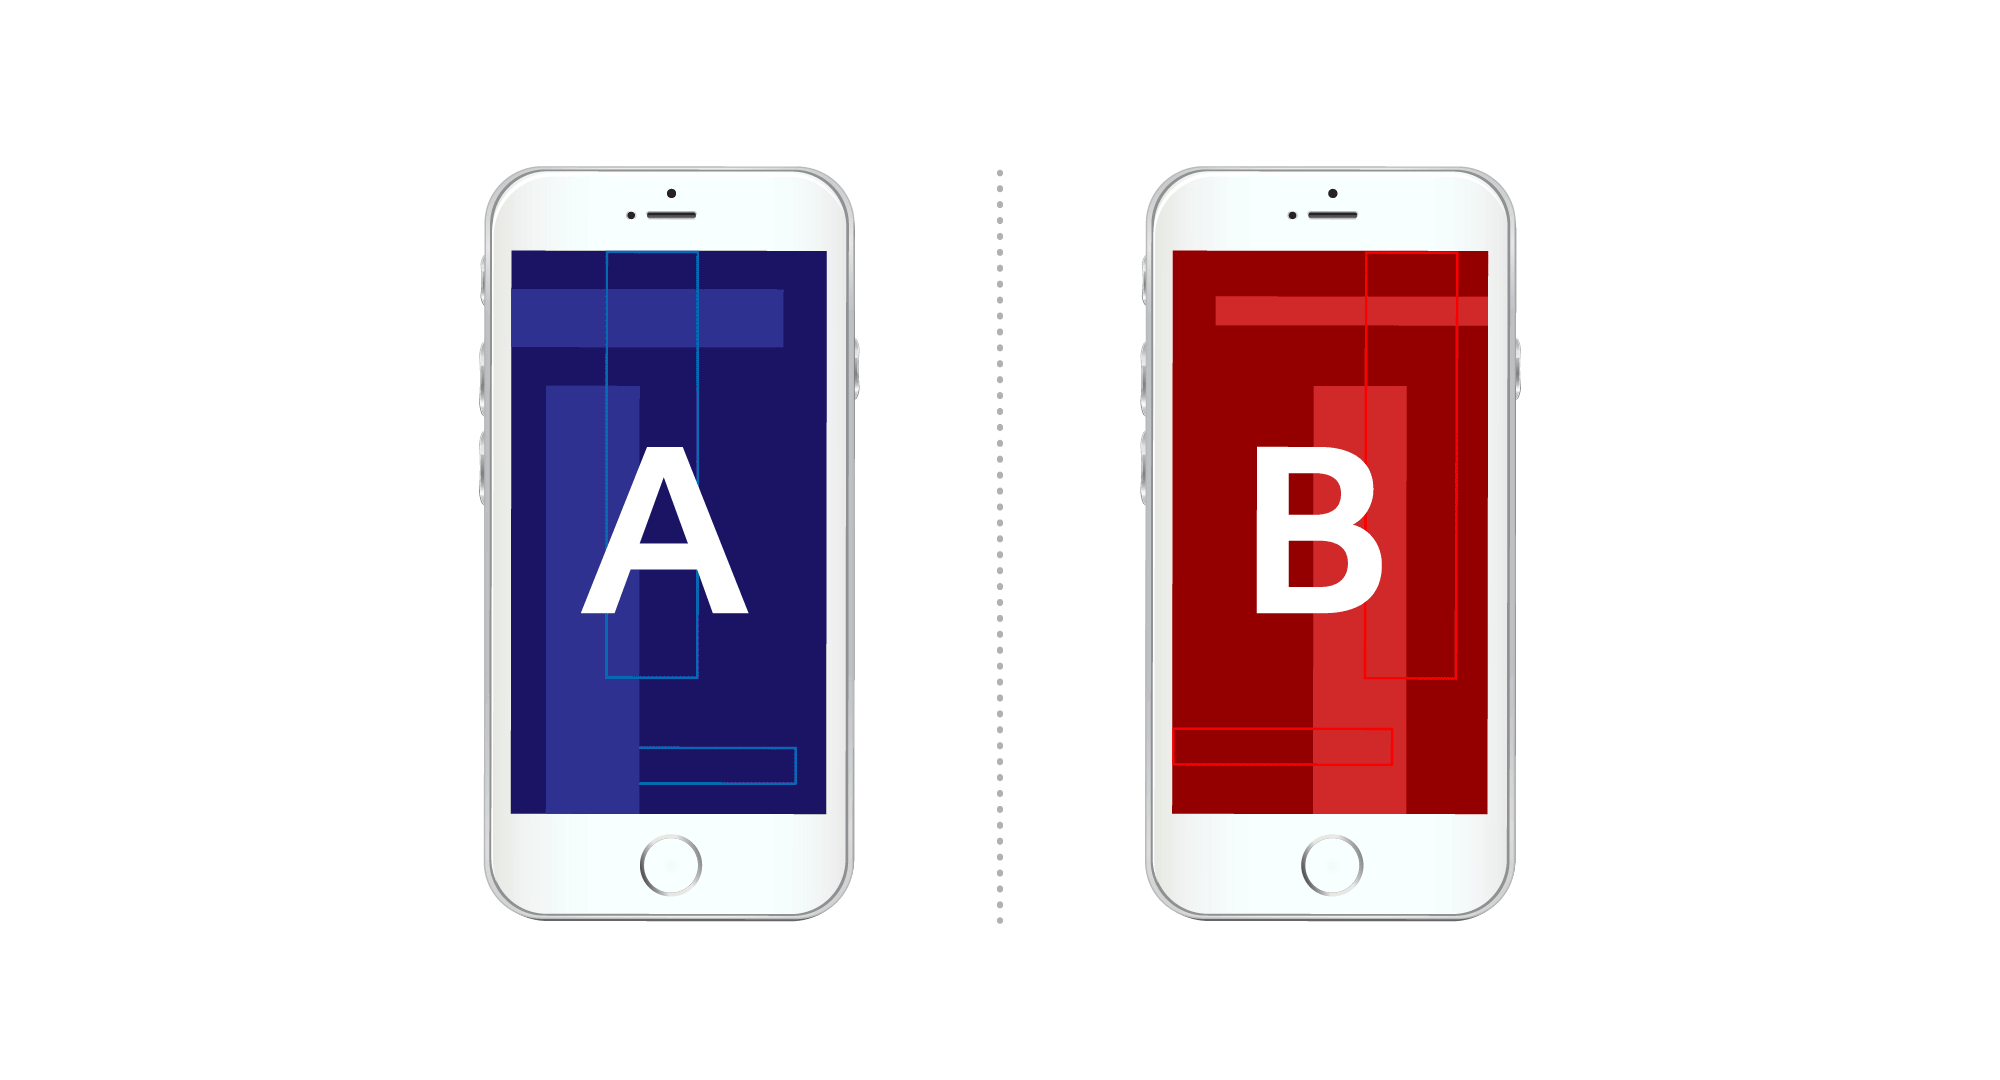
  
<hr style="border: none;
           height: 6px; 
           border-radius:7px;
           background-color: #0B3D91; 
           margin: 20px auto;">

# Introduction

An A/B test is a type of experiment that enables the comparison of the effects between two different variations. In the test, two versions, referred to as A and B, are randomly assigned, and their performances are measured. Ultimately, the version that yields better results is chosen. A/B tests are commonly used for websites, applications, or advertising campaigns, helping businesses to analyze customer behavior and optimize their services or products.

As mentioned before, in A/B tests, we need to compare two variations so to have two different hypotheses: the Null Hypothesis and the Alternative Hypothesis. The Null Hypothesis states that there is no statistically significant difference between the comparisons. Therefore, our Null Hypothesis is as follows:

$$H_0: \mu_0 = \mu_1$$

The statement suggests that there is no difference between variations A and B. In other words, it posits the hypothesis that there is no statistically significant difference in the performances of variations A and B.

On the other hand, the Alternative Hypothesis is the hypothesis where we expect the new variation to perform better. In other words, we are talking about a real difference:


$$H_0: \mu_0 \neq \mu_1$$

Once the hypotheses are formulated, statistical evidence is required to support them. Statistical evidence is obtained through the analysis of the collected data and the application of appropriate statistical methods.

To assess whether the findings are due to chance or not, statistical tests are used. The choice of the test depends on the tested hypothesis and the nature of the data set. In this notebook, an A/B test will be conducted using two different data sets.

The statistical test used for the A/B test is determined to test a specific hypothesis. During the test process, data obtained by comparing the performances of the control and test groups are utilized. Parametric tests like t-tests or non-parametric tests like the Mann-Whitney U test can be employed to test the hypotheses.

It is also important to ensure assumptions such as data distribution and homogeneity of variances. When these assumptions are met, parametric tests can be used; otherwise, non-parametric tests are preferred.

The interpretation of test results is used to determine whether the hypotheses are supported or not. Based on the outcomes of statistical tests, statistical evidence that supports or rejects the hypotheses can be presented.

This scientific process is crucial to ensure that the A/B test is conducted correctly and that the obtained results are statistically significant and reliable.

### Confidence Level

Determining the confidence level is essential to measure the reliability of a hypothesis and make accurate decisions. The confidence level is used to decide which design is more effective based on the statistical data obtained from the test. A commonly preferred value for the confidence level is 95% in research studies. However, in sensitive research areas (such as the healthcare sector), this value can be increased to 99%. In this notebook, the confidence level is set at 95%. This level ensures that the obtained results are statistically significant and allows for making reliable decisions.

### Sampling

Sampling is the process of selecting a subset of a population and using the data from this subset to make general conclusions. Sampling is crucial because examining the entire population can be both time-consuming and costly. In some cases, it may even be impossible to examine the entire population. Sampling can be used not only to understand the characteristics of the population by collecting sufficient data but also to draw conclusions about specific subjects.

Therefore, in an A/B test, sampling is important for obtaining accurate results, ensuring statistical reliability, saving time and costs, and improving applicability. Conducting tests on a randomly selected group using proper sampling methods allows for making reliable predictions about the general population. Sampling helps to reduce costs, speed up the testing process, and achieve practical and applicable results.

Specific methods are used when selecting a sample. These methods generally involve obtaining random samples from a population to reach a certain sample size using statistical techniques. The choice of method depends on how the hypothesis will be tested.

Sample size is another important consideration. It refers to the number of data points in the sample and is dependent on factors such as the size of the population, the confidence interval, the margin of error, and the distribution of data. When calculating the sample size, the representation rate of the population and the desired level of confidence are essential. One of the most common formulas used to determine the sample size takes into account the critical value (Z) corresponding to the confidence level, the estimated proportion (p) for the relevant characteristic in the population, and the acceptable margin of error (E), calculating the sample size based on the chosen confidence level.

$$ n = \frac{Z^2.p.(1 - p)}{E^2} $$

# A. Case Study - I

<b>Business Problem:</b> Increasing Revenue through Variant Optimization

<b>Background:</b>

A company launched an A/B test with two variants on its website in order to increase revenue. The test randomly assigned users to either Variant A or Variant B and tracked the income generated by each user. The experiment data is stored in an Excel file and includes user IDs, the variant they were exposed to, and the revenue brought by each user.

<b>Objective:</b>

The objective of the A/B test is to determine which variant (Variant A or Variant B) leads to higher revenue. By identifying the more effective variant, you aim to optimize the website design or user experience to increase overall revenue.

<b>Business Questions:</b>

- Which variant generated higher revenue during the A/B test?

- Is the difference in revenue between the variants statistically significant?

- What insights can be derived from the revenue data to optimize the website and drive revenue growth?

<b>Approach:</b>

To address these business questions, perform statistical analysis on the A/B test data will be performed. The revenue outcomes between Variant A and Variant B using appropriate statistical tests (e.g., t-test or Mann-Whitney U test) will be compared. Additionally,the revenue patterns and identify potential factors contributing to revenue differences, such as user behavior, demographics, or website features will be analyzed.

By answering these questions and gaining insights from the A/B test data, the stakeholders will be able to make data-driven decisions to optimize the website, improve user experience, and ultimately increase revenue for the business.


### 1. Data Cleaning and Analysis

In [2]:
df = pd.read_csv('/kaggle/input/ab-test-data/AB_Test_Results.csv')

def perform_EDA(dataframe):
    """
    Perform Exploratory Data Analysis (EDA) on the given dataframe.

    Parameters:
        dataframe (pandas.DataFrame): The dataframe to perform EDA on.

    Prints:
        - Dataset Sample: Displays a sample of the dataset.
        - Dataset Information: Provides information about the dataset.
        - Duplicated Values: Calculates and displays the sum of duplicated values in the dataset.
        - Unique Values: Displays the count of unique values in each column of the dataset.
        - Dataset Description: Provides descriptive statistics of the dataset.

    Returns:
        None
    """
    print("---- Dataset Sample ".ljust(50, '-'))
    print('')
    print(dataframe.sample(n = 10))
    print('') 
    print("---- Dataset Information ".ljust(50, '-'))
    print('')
    print(dataframe.info())
    print('') 
    print("---- Duplicated Values ".ljust(50, '-'))
    print('')
    print('Sum of Duplicated Values:', df.duplicated().sum())
    print('')
    print('') 
    print("---- Unique Values ".ljust(50, '-'))
    print('')
    print(df.nunique())
    print('')
    print("---- Dataset Description ".ljust(50, '-'))
    print('')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print('')
    
perform_EDA(df)

---- Dataset Sample ------------------------------

      USER_ID VARIANT_NAME  REVENUE
5686     2284      control  0.00000
2575     9235      control  0.00000
5779     1886      variant  0.00000
1911     1576      control  0.00000
787      5460      variant  0.00000
5913     3121      control  0.00000
4896     6885      control  0.00000
5432      782      control  0.00000
8142     3152      variant  0.00000
9770     5433      variant  0.00000

---- Dataset Information -------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB
None

---- Duplicated Values ---------------------------

Sum of Duplicated Values: 2067


---- Unique Values ---

In the initial analysis of the dataset, we observe the presence of duplicated values. Before defining the hypotheses, it is essential to clean the data by removing these duplicates.

In [3]:
variant_group = df[df['VARIANT_NAME'] == 'variant'].drop_duplicates(keep = 'first')
control_group = df[df['VARIANT_NAME'] == 'control'].drop_duplicates(keep = 'first')
df = pd.concat([variant_group, control_group], ignore_index = True)
df.reset_index(drop=True, inplace=True)

After removing duplicate values from the dataset, we can move on to addressing the issue of outliers. In the initial data analysis, it was noticed that there was an extreme increase in the Revenue value from the 99th percentile to the 100th percentile. To ensure better results in statistical tests, these extreme values should be removed from the dataset. To support this, the t-based confidence interval of the Revenue values should be observed before and after removing the outliers from the dataset.

In [4]:
conf_int = sms.DescrStatsW(df['REVENUE']).tconfint_mean()

print(f'95% confidence interval for Revenue: {conf_int}')

95% confidence interval for Revenue: (0.06808022416158013, 0.18263703286602603)


In [5]:
def outlier_thresholds(dataframe, variable):
    """
    Calculate the lower and upper outlier thresholds for a given variable in the dataframe.

    Parameters:
        dataframe (pandas.DataFrame): The dataframe containing the variable.
        variable (str): The name of the variable for which outlier thresholds will be calculated.

    Returns:
        tuple: A tuple containing the lower and upper outlier thresholds.
    """
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit.round(), up_limit.round()


def replace_with_thresholds(dataframe, variable):
    """
    Replace the outliers in the given variable of the dataframe with the lower and upper thresholds.

    Parameters:
        dataframe (pandas.DataFrame): The dataframe containing the variable.
        variable (str): The name of the variable for which outliers will be replaced.

    Returns:
        None  
    """
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
replace_with_thresholds(df, "REVENUE")

In [6]:
conf_int = sms.DescrStatsW(df['REVENUE']).tconfint_mean()

print(f'95% confidence interval for Revenue: {conf_int}')

95% confidence interval for Revenue: (0.04618289998844694, 0.06783701681478009)


Based on the statement that outliers have been replaced, and the t-based confidence interval of the Revenue values is deemed acceptable, we can proceed to the next step of the analysis. Removing or handling outliers appropriately is crucial to ensure that extreme values do not unduly influence the statistical results. With the outlier issue addressed, the data is now more robust, and we can proceed with hypothesis definitation and testing and further analysis with confidence. 

### 2. Defining the Hypothesis for the A/B Test

In this section, we will define the hypothesis for the A/B test. As mentioned earlier, the A/B test aims to compare the revenue of two variations, A and B, and determine if there is a statistically significant difference between them.

In [7]:
df.groupby('VARIANT_NAME').agg({'REVENUE': 'mean'})

,REVENUE
VARIANT_NAME,
control,0.06509
variant,0.04890


Based on the above results, it is evident that the revenue values of the control group are better than those of the variant group. However, at this point, we do not know if this difference is merely a result of random chance. To test this, we can define our hypotheses as follows:

$$ H_0: \text{There is no statistically significant difference between the revenue of} \\
\text{the control and variant groups.} $$

$$ H_1: \text{There is a statistically significant difference between the revenue of} \\
\text{the control and variant groups.} $$

### 3. Conducting the Hypothesis Test

In this section, we will perform the hypothesis test to determine whether there is a statistically significant difference between the revenue of the control and variant groups.

To test the hypotheses, we will use an appropriate statistical test based on the nature of the data and assumptions. One of the assumptions is the normality assumption. To test this assumption, we will apply the Shapiro-Wilk test.

The Shapiro-Wilk test is a widely used test for assessing the normality of a distribution. It tests the null hypothesis that the data is normally distributed against the alternative hypothesis that the data does not follow a normal distribution. If the p-value obtained from the Shapiro-Wilk test is greater than the chosen significance level (typically 0.05), we will fail to reject the null hypothesis and conclude that the data can be assumed to be normally distributed.

In [8]:
test_stat, pvalue = shapiro(df.loc[df["VARIANT_NAME"] == "variant", "REVENUE"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["VARIANT_NAME"] == "control", "REVENUE"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


Test Stat = 0.0877, p-value = 0.0000
Test Stat = 0.0992, p-value = 0.0000


Based on the results of the Shapiro-Wilk test, which produced a p-value of 0.000 for both the control and variant groups, we reject the null hypothesis of normality. Therefore, the revenue data for both groups does not follow a normal distribution.

As the normality assumption is violated, we will opt for a non-parametric test, specifically the Mann-Whitney U test, to compare the means of the control and variant groups. The Mann-Whitney U test is suitable for data that does not meet the normality assumption and is used to assess if there is a statistically significant difference between two independent groups.

By conducting the Mann-Whitney U test on the revenue data, we will determine whether there is a statistically significant difference between the control and variant groups in terms of revenue. The test results, along with relevant statistics and interpretations, will be presented to ensure the validity and reliability of the hypothesis test. This will provide us with valuable insights into the performance of the variations and guide us in making data-driven decisions based on the statistical evidence.


In [9]:
test_stat, pvalue = mannwhitneyu(df.loc[df["VARIANT_NAME"] == "variant", "REVENUE"],
                                 df.loc[df["VARIANT_NAME"] == "control", "REVENUE"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 7850692.0000, p-value = 0.5129


The Mann-Whitney U test resulted in a p-value of 0.5129. Based on this p-value, we fail to reject the null hypothesis, indicating that there is no statistically significant difference in revenue between the two variants.

Regarding which variant generated higher revenue during the A/B test, the statistical test does not provide evidence of a significant distinction. Both the control and variant groups seem to perform similarly in terms of revenue.

Since there is no statistically significant difference in revenue between the variants, we can conclude that the A/B test did not reveal a clear winner in terms of generating revenue. This implies that the variations may have similar impacts on revenue, and other factors might be contributing to the observed revenue values.

To optimize the website and drive revenue growth, it would be beneficial to explore additional variables or factors that might influence revenue. Conducting further analyses, such as user behavior analysis, conversion rate optimization, or customer segmentation, could provide deeper insights into revenue generation. Additionally, gathering qualitative feedback from users or customers through surveys or interviews may uncover valuable insights to inform optimization strategies.

In conclusion, while the A/B test did not show a statistically significant difference in revenue between the control and variant groups, it opens up opportunities to explore other avenues for website optimization and revenue growth. Data-driven decision-making, coupled with a comprehensive understanding of user behavior and preferences, will be crucial in devising effective strategies to enhance revenue generation and overall business performance.

# B. Case Study - II

<b>Business Problem:</b> Increasing Conversion Rate through Landing Page Redesign

<b>Background:</b>

An e-commerce company is looking to improve the conversion rate on its website's product pages by testing two different landing page designs. The company has randomly divided users into two groups: the treatment group, which is exposed to the new landing page design, and the control group, which continues to see the existing landing page design. Each user's interaction is tracked through timestamps, and a binary "converted" value indicates whether the user completed the desired action (conversion) on the page or not.

<b>Objective:</b>

The main objective of the A/B test is to determine whether the new landing page design (treatment group) leads to a higher conversion rate compared to the existing design (control group). By identifying the more effective landing page design, the company aims to optimize its product pages and increase the overall conversion rate, which would positively impact sales and revenue.

<b>Business Questions:</b>

- Which landing page design (treatment or control) resulted in a higher conversion rate during the A/B test?

- Is the difference in conversion rates between the two landing page designs statistically significant?

- What insights can be derived from the conversion rate data to optimize the landing pages and drive higher conversion rates?

<b>Approach:</b>

To address these business questions, the company will perform a two-sample proportion test (two-sample Z-test for proportions) on the A/B test data. This test will compare the conversion rates between the treatment (new landing page) and control (existing landing page) groups.

The timestamps in the dataset will also enable the company to analyze user behavior and interactions over time, helping to gain insights into user engagement patterns and potential trends that might influence the conversion rates.

Additionally, the company will conduct a thorough examination of the landing page designs, identifying elements such as the layout, call-to-action buttons, visuals, and content that may be influencing the conversion rate. These insights will guide the company in making data-driven decisions to optimize the landing pages and improve the user experience, ultimately leading to increased conversion rates and improved business performance.

By using the two-sample proportion test and analyzing user behavior, the company will be able to confidently assess the impact of the new landing page design and take steps to enhance its conversion rate, driving growth and success for the business.

Please note that the specific analysis and approach may vary depending on the characteristics of the dataset and the goals of the A/B test.

### 1. Data Cleaning and Analysis

In [10]:
df = pd.read_csv('/kaggle/input/ab-testing/ab_data.csv')

perform_EDA(df)

---- Dataset Sample ------------------------------

        user_id                   timestamp      group landing_page  converted
249127   833133  2017-01-20 08:00:51.943829    control     old_page          0
260920   637900  2017-01-15 07:13:04.682861    control     old_page          0
130456   872045  2017-01-22 22:51:20.636427  treatment     new_page          0
3263     857351  2017-01-06 23:13:52.330958    control     old_page          0
62606    716636  2017-01-02 14:07:53.037404  treatment     new_page          0
229514   765433  2017-01-18 01:25:36.121538    control     old_page          0
74341    863856  2017-01-07 10:44:21.739049    control     old_page          0
62713    764479  2017-01-21 01:38:39.302440  treatment     new_page          1
87433    804581  2017-01-21 16:36:44.141771  treatment     new_page          0
98836    638045  2017-01-04 15:31:50.542001  treatment     new_page          0

---- Dataset Information -------------------------

<class 'pandas.core.frame.

Based on the information obtained about the dataset, dataset has 294,478 rows and no missing values, indicating a complete dataset. Upon inspecting the dtype column, it appears that the data types are appropriately assigned for the given features, as seen from the first 10 rows of the dataset.

Next, it is observed that the user_id column contains 290,584 unique values. This suggests that some users may have been recorded multiple times, indicating potential duplicate data. These duplicated entries could be a result of users making multiple transactions or, in some cases, entirely repetitive data entries. To ensure the validity of the analysis, these duplicate rows from the dataset should be removed, as they may negatively impact the conclusions in either scenario.

Therefore, for the purpose of the study, the duplicated rows are removed to maintain the integrity of the data and avoid any potential bias in the analysis.

In [11]:
df.drop_duplicates( subset = 'user_id', keep = 'first', inplace = True)

df.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

After applying the drop_duplicates() method to the dataset, it is ensured that any duplicate rows are removed, and the dataset is now ready for further analysis. Now it should be proceed to generate samples for our A/B test. Fortunately, there is a Python module available to calculate the sample size using the formula shared earlier.

In [12]:
confidence_level = 0.95 # --> The confidence level specified when formulating the hypothesis.
alpha = 1 - confidence_level # --> The significance level or alpha value, representing the maximum risk level for the hypothesis.
power = 0.8 # --> The measure of the probability of not rejecting the null hypothesis when it is false, often set to 0.8 for medical research.
effect_size = 0.02 # --> A small effect size that is considered acceptable for our analysis, set to 0.02.
random_state = 42 # --> A reference to Douglas Adams' number 42, related to the meaning of the universe.

n = sms.NormalIndPower().solve_power(
                                     effect_size = effect_size,
                                     alpha = alpha,
                                     power = power,
                                     ratio = 1
                                    )

sample_control = df.loc[df['group'] == 'control'].sample(n = round(n), random_state = random_state) 
sample_treatment = df.loc[df['group'] == 'treatment'].sample(n = round(n), random_state = random_state)

ab_test = pd.concat([sample_control, sample_treatment], axis = 0).reset_index(drop = True)
ab_test

,user_id,timestamp,group,landing_page,converted
0,723859,2017-01-13 13:23:44.371785,control,old_page,1
1,729591,2017-01-03 10:26:48.735727,control,old_page,0
2,791807,2017-01-13 16:59:18.346932,control,old_page,0
3,695740,2017-01-11 16:04:38.540309,control,old_page,0
4,712633,2017-01-13 12:26:18.400155,control,old_page,0
...,...,...,...,...,...
78483,727409,2017-01-17 01:59:05.840135,treatment,new_page,0
78484,918113,2017-01-11 17:43:59.709647,treatment,new_page,0
78485,813699,2017-01-20 07:42:19.393500,treatment,new_page,0
78486,728202,2017-01-04 13:42:23.249874,treatment,new_page,0


After creating samples for the two groups and merging them into a single dataset, it should be ensured that the dataset is properly prepared for further analysis.

In [13]:
perform_EDA(ab_test)

---- Dataset Sample ------------------------------

       user_id                   timestamp      group landing_page  converted
6332    721059  2017-01-04 11:02:15.810851    control     old_page          0
67736   808755  2017-01-08 20:10:42.015805  treatment     new_page          0
36268   847114  2017-01-22 21:14:54.284339    control     old_page          0
21945   835218  2017-01-19 03:33:37.878551    control     old_page          0
52261   804349  2017-01-15 05:36:58.006691  treatment     new_page          1
56104   707608  2017-01-11 23:34:10.078803  treatment     new_page          0
77487   922794  2017-01-13 17:03:42.350723  treatment     new_page          0
10239   723148  2017-01-22 20:51:20.238296    control     old_page          0
65677   692434  2017-01-08 14:29:12.499880  treatment     new_page          1
53810   903222  2017-01-23 11:54:32.983187  treatment     new_page          0

---- Dataset Information -------------------------

<class 'pandas.core.frame.DataFrame'>

The sample sizes of the two groups are balanced, and the dataset has been verified to meet the necessary criteria for further analysis. The data integrity checks have confirmed the absence of missing values, appropriate data types, no duplicate rows, and a well-distributed dataset.

### 2. Defining the Hypothesis for the A/B Test

To examine the conversion rates, some basic statistics for the 'converted' column will be calculated within each group. Specifically,the mean, standard deviation, and standard error will be computed for the 'converted' values in both the control and treatment groups.

The mean conversion rate represents the average proportion of users who completed the desired action (conversion) in each group. The standard deviation provides information about the dispersion or spread of the conversion rate values around the mean, while the standard error is a measure of the precision of the estimated mean conversion rate.

These statistics will allow us to gain insights into the performance of the landing page designs and make comparisons between the groups' conversion rates. With this information, we can further analyze the effectiveness of the new landing page design in increasing the conversion rate and guiding data-driven decisions for optimizing the website's performance.

In [14]:
conversion_rates = ab_test.groupby('group')['converted'].agg(['mean','std','sem'])
conversion_rates.columns = ['conversion_rate', 'std_deviation','std_error']
conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.120,0.325,0.002
treatment,0.118,0.323,0.002


Based on the obtained statistics, the standard deviation and standard error values appear to be similar between the groups. However, a slight difference is observed in the conversion rates. As a result, we can assume that there might not be a significant difference between the two groups.

In [15]:
import plotly.graph_objs as go
import plotly.offline as pyo

data = [go.Bar(x=conversion_rates.index, y=conversion_rates['conversion_rate'],
              error_y=dict(type='data', array=conversion_rates['std_error'],visible=True), marker_color = ['#7149C6', '#FC2947'])]

layout = go.Layout(title='Conversion rate by group', xaxis=dict(title='Group'),yaxis=dict(title='Converted (proportion)',
                                                                                        range=[0, 0.17]))

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)

The choice of the metric depends on the tested hypothesis and the nature of the dataset. In this case, we will use the Conversion Rate metric to test the hypothesis. The Conversion Rate metric measures the proportion of users who perform a specific action or achieve a target goal among the total number of users who visited a web page.

The interactive plot created using Plotly is descriptive in nature and helps visualize the assumptions.

Nonetheless, before drawing any definitive conclusions, it is essential to determine whether this small difference in conversion rates is statistically significant. To achieve this, we need to denife the hypothesises and perform a hypothesis test.

$$ H_0: \text{There is no statistically significant difference in the conversion rates} \\
\text{between the control and treatment groups.} $$

$$ H_0: \text{There is a statistically significant difference in the conversion rates} \\
\text{between the control and treatment groups.} $$


### 3. Conducting the Hypothesis Test

Now, we are ready to proceed with the hypothesis test. For this purpose, we will calculate the statistical test value Z, the p-value representing the result of the hypothesis test, and the confidence intervals for each group.

By conducting the hypothesis test and calculating these values, we aim to determine whether the observed difference in conversion rates is statistically significant or can be attributed to random chance. The Z statistic and p-value will help us make an evidence-based decision regarding the acceptance or rejection of the null hypothesis. Additionally, the confidence intervals will provide valuable insights into the precision of the estimated conversion rates for both the control and treatment groups.

With the hypothesis test results and the accompanying statistical values, we can draw reliable conclusions about the effectiveness of the new landing page design in influencing the conversion rate. This will guide data-driven decision-making for website optimization and improving the overall user experience.

In [16]:
c_results = ab_test.loc[ab_test['group'] == 'control', 'converted']
t_results = ab_test.loc[ab_test['group'] == 'treatment', 'converted']


test_stat, pvalue = proportions_ztest([c_results.sum(), t_results.sum()],
                                nobs = [len(c_results), len(t_results)])

conf_int_c = sms.DescrStatsW(c_results).tconfint_mean()
conf_int_t = sms.DescrStatsW(t_results).tconfint_mean()

print(f'Test Stat: {test_stat:.4f}')
print(f'p-value: {pvalue:.4f}')
print(f'95% confidence interval for control group: {conf_int_c}')
print(f'95% confidence interval for treatment group: {conf_int_t}')

Test Stat: 0.9259
p-value: 0.3545
95% confidence interval for control group: (0.11687846293145154, 0.1233111201895351)
95% confidence interval for treatment group: (0.114762924942806, 0.12114574899461118)


The calculated p-value from the hypothesis test is 0.3545, which exceeds the significance level. As a result, we fail to reject the null hypothesis. The statistical test did not find significant evidence to conclude that there is a significant difference in conversion rates between the two landing page designs. In other words, the observed difference in conversion rates may be attributed to random variation rather than a true effect of the design change.

While the A/B test results did not indicate a statistically significant difference in conversion rates, the small difference observed suggests that both landing page designs perform similarly in terms of converting users. To further optimize the landing pages and drive higher conversion rates, additional analyses and considerations may be required.
